# Proyek Klasifikasi Gambar: [Vegetable Image Dataset]
- **Nama:** Rebecca Olivia Javenka Br. Manurung
- **Email:** [rebeccaolivia1601@gmail.com]
- **ID Dicoding:** [rebeccaolivia]

## Import Semua Packages/Library yang Digunakan

In [21]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

## Data Preparation

### Data Loading

In [22]:
import kagglehub

# Download dataset dari Kaggle
path = kagglehub.dataset_download("misrakahmed/vegetable-image-dataset")
print("Path to dataset files:", path)

# Path utama dataset
base_path = os.path.join(path, "Vegetable Images")

Path to dataset files: /kaggle/input/vegetable-image-dataset


In [23]:
# Path dataset asli
original_base = "/kaggle/input/vegetable-image-dataset/Vegetable Images"
combined_dir = "/kaggle/working/combined_vegetables"

# Buat folder baru untuk data gabungan
os.makedirs(combined_dir, exist_ok=True)

# Loop untuk menggabungkan semua gambar
for split in ['train', 'validation', 'test']:
    split_path = os.path.join(original_base, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        dest_path = os.path.join(combined_dir, class_name)
        os.makedirs(dest_path, exist_ok=True)

        # Salin semua gambar ke folder baru
        for img_file in os.listdir(class_path):
            src = os.path.join(class_path, img_file)
            dst = os.path.join(dest_path, f"{split}_{img_file}")
            shutil.copy(src, dst)

print("✅ Semua data telah digabungkan!")

✅ Semua data telah digabungkan!


In [24]:
base_path = "/kaggle/working/manual_split"
all_classes = os.listdir(combined_dir)

# Buat folder untuk train/val/test
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_path, split), exist_ok=True)
    for class_name in all_classes:
        os.makedirs(os.path.join(base_path, split, class_name), exist_ok=True)

# Bagi setiap kelas secara proporsional
for class_name in all_classes:
    class_path = os.path.join(combined_dir, class_name)
    all_images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]

    # Split 70% train, 15% val, 15% test
    train, temp = train_test_split(all_images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    # Salin ke folder baru
    for img in train:
        shutil.copy(os.path.join(class_path, img), os.path.join(base_path, 'train', class_name, img))
    for img in val:
        shutil.copy(os.path.join(class_path, img), os.path.join(base_path, 'val', class_name, img))
    for img in test:
        shutil.copy(os.path.join(class_path, img), os.path.join(base_path, 'test', class_name, img))

print("✅ Dataset telah dibagi secara manual!")

✅ Dataset telah dibagi secara manual!


In [25]:
print("Jumlah gambar per kelas di setiap subset:")
for split in ['train', 'val', 'test']:
    print(f"\n🔹 {split.upper()}:")
    for class_name in all_classes:
        count = len(os.listdir(os.path.join(base_path, split, class_name)))
        print(f"{class_name}: {count} gambar")

Jumlah gambar per kelas di setiap subset:

🔹 TRAIN:
Papaya: 980 gambar
Capsicum: 980 gambar
Tomato: 980 gambar
Bitter_Gourd: 980 gambar
Broccoli: 980 gambar
Pumpkin: 980 gambar
Carrot: 980 gambar
Cucumber: 980 gambar
Bean: 980 gambar
Cauliflower: 980 gambar
Brinjal: 980 gambar
Cabbage: 980 gambar
Bottle_Gourd: 980 gambar
Potato: 980 gambar
Radish: 980 gambar

🔹 VAL:
Papaya: 210 gambar
Capsicum: 210 gambar
Tomato: 210 gambar
Bitter_Gourd: 210 gambar
Broccoli: 210 gambar
Pumpkin: 210 gambar
Carrot: 210 gambar
Cucumber: 210 gambar
Bean: 210 gambar
Cauliflower: 210 gambar
Brinjal: 210 gambar
Cabbage: 210 gambar
Bottle_Gourd: 210 gambar
Potato: 210 gambar
Radish: 210 gambar

🔹 TEST:
Papaya: 210 gambar
Capsicum: 210 gambar
Tomato: 210 gambar
Bitter_Gourd: 210 gambar
Broccoli: 210 gambar
Pumpkin: 210 gambar
Carrot: 210 gambar
Cucumber: 210 gambar
Bean: 210 gambar
Cauliflower: 210 gambar
Brinjal: 210 gambar
Cabbage: 210 gambar
Bottle_Gourd: 210 gambar
Potato: 210 gambar
Radish: 210 gambar


In [44]:
# Load data training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_path, 'train'),
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Load data validasi
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_path, 'val'),
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# Load data testing (tidak di-shuffle agar konsisten)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_path, 'test'),
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='categorical'
)

# Dapatkan nama kelas
class_names = train_ds.class_names
print("\nKelas yang terdeteksi:", class_names)

Found 14700 files belonging to 15 classes.
Found 3150 files belonging to 15 classes.
Found 3150 files belonging to 15 classes.

Kelas yang terdeteksi: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


### Data Preprocessing

In [45]:
# Normalisasi pixel ke range [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [46]:
# Optimasi dengan prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

## Modelling

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

In [48]:
model = tf.keras.Sequential([
    # Blok Conv 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Blok Conv 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Blok Conv 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Fully Connected
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # 15 kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,249,423 (84.87 MB)

 Trainable params: 22,248,975 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [51]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)

# Training
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 35s 61ms/step - accuracy: 0.5688 - loss: 11.8679 - val_accuracy: 0.5937 - val_loss: 2.6930 - learning_rate: 0.0010
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.8361 - loss: 1.2802 - val_accuracy: 0.7498 - val_loss: 3.6330 - learning_rate: 0.0010
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8965 - loss: 0.5506 - val_accuracy: 0.9111 - val_loss: 0.5263 - learning_rate: 0.0010
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9205 - loss: 0.3766 - val_accuracy: 0.8495 - val_loss: 1.1580 - learning_rate: 0.0010
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9169 - loss: 0.4620 - val_accuracy: 0.8384 - val_loss: 1.4992 - learning_rate: 0.0010
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9251 - loss: 0.4045 - val_accuracy: 0.4505 - val_loss: 28.5183 - learning_rate: 0.0010
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9325 -

## Evaluasi dan Visualisasi

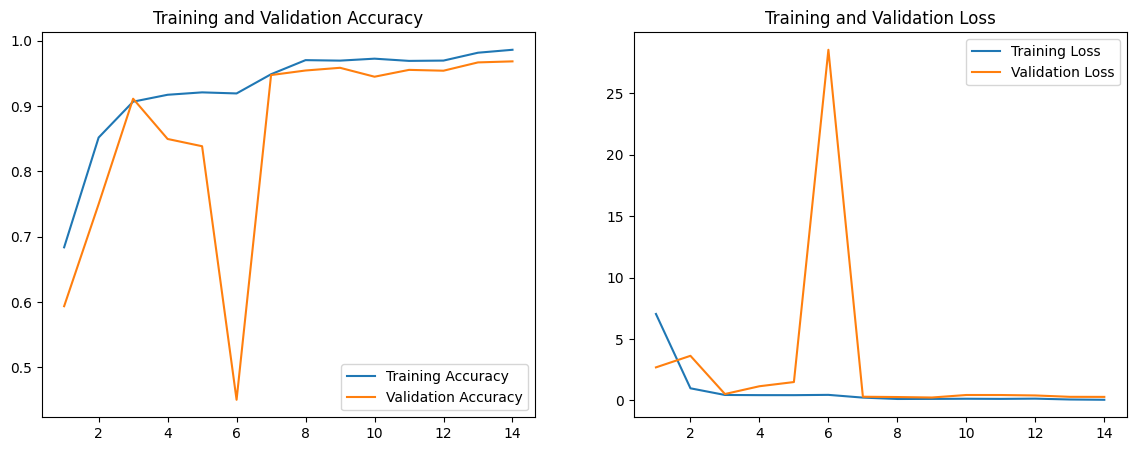

In [52]:
import matplotlib.pyplot as plt

# Ambil data history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [53]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9671 - loss: 0.2123

Test Accuracy: 0.9600
Test Loss: 0.2951


## Konversi Model

In [60]:
import os
import tensorflow as tf

# Buat folder utama untuk semua model
model_dir = "model_vegetable_classification"
os.makedirs(model_dir, exist_ok=True)

### Simpan model dalam format SavedModel


In [61]:
saved_model_dir = os.path.join(model_dir, "saved_model")
model.export(saved_model_dir)  # Gunakan export() untuk format SavedModel

Saved artifact at 'model_vegetable_classification/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_52')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  133440211333584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420851984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420854288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420853712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420854096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420852560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420850256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420850064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420849872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133437420850640: TensorSpec(shape=(), dtype=tf.resourc

### Konversi ke TFLite

In [63]:
tflite_dir = os.path.join(model_dir, "tflite")
os.makedirs(tflite_dir, exist_ok=True)

tflite_path = os.path.join(tflite_dir, "model.tflite")
labels_path = os.path.join(tflite_dir, "labels.txt")

# Konversi dari SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Simpan model + label
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

with open(labels_path, 'w') as f:
    f.write("\n".join(class_names))  # class_names dari training

### Konversi ke TensorFlow.js

In [64]:
tfjs_dir = os.path.join(model_dir, "tfjs")
os.makedirs(tfjs_dir, exist_ok=True)

# Install library dan konversi
!pip install tensorflowjs
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    {saved_model_dir} \
    {tfjs_dir}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-05-24 02:32:52.063090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748053972.082983   30900 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attem

### Download Model

In [70]:
import shutil
shutil.make_archive("model_vegetable_classification", 'zip', "model_vegetable_classification")

from google.colab import files
files.download("model_vegetable_classification.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

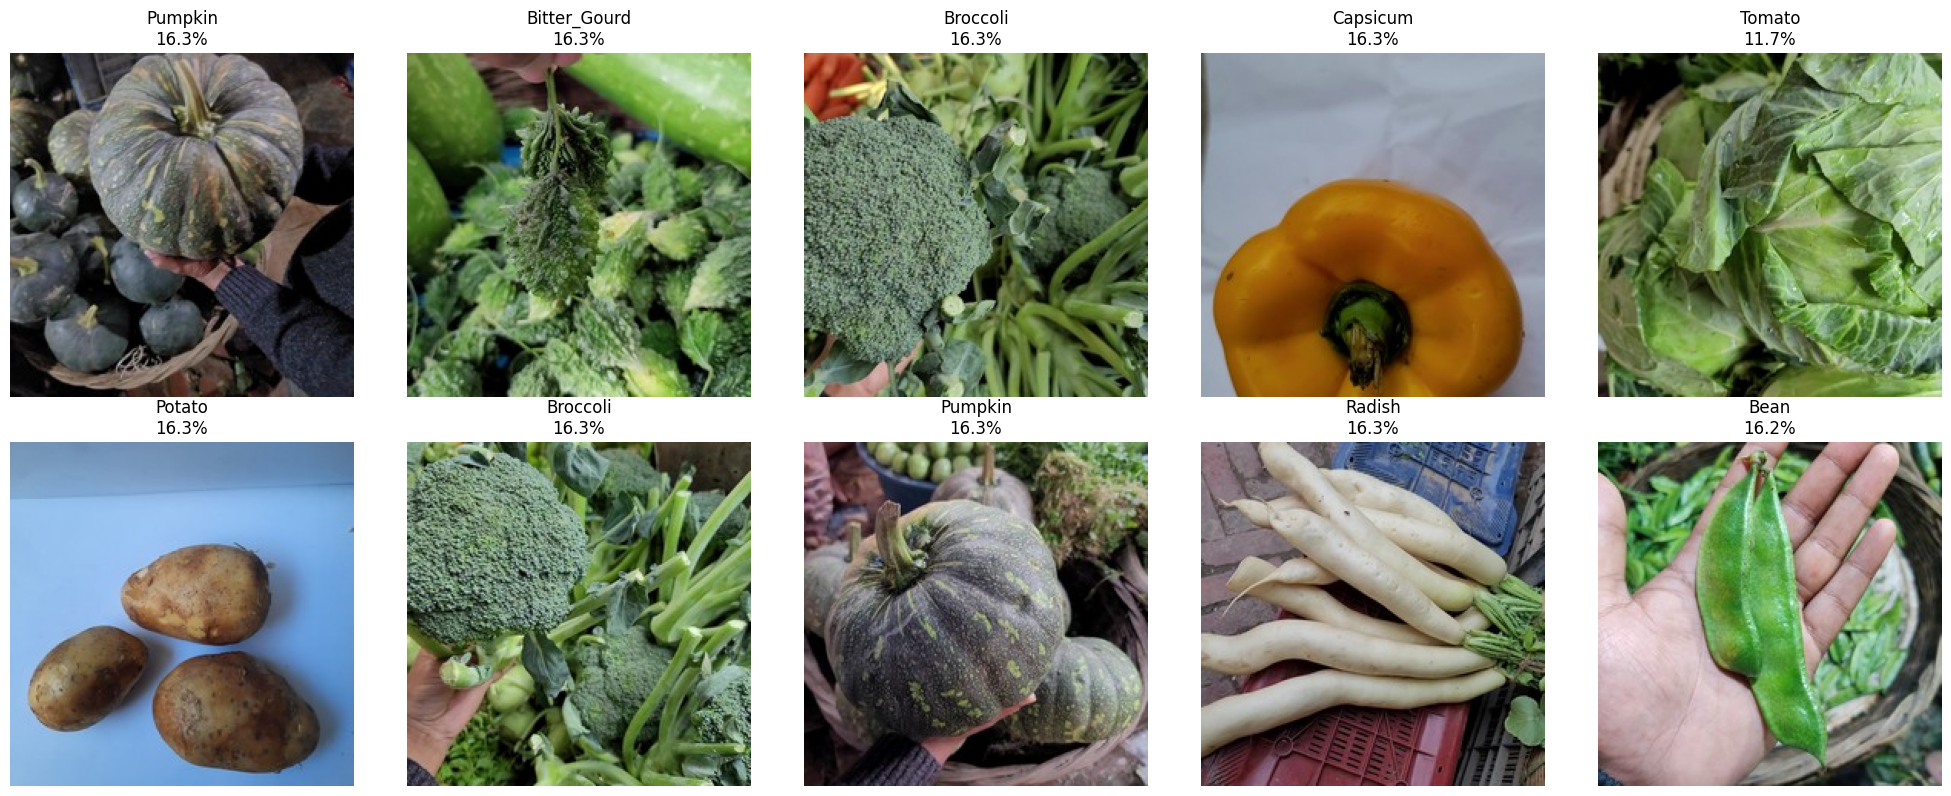


Gambar: train_0283.jpg
Top 3 Prediksi:
  Pumpkin             : 16.26%
  Tomato              : 5.98%
  Radish              : 5.98%

Gambar: train_0479.jpg
Top 3 Prediksi:
  Bitter_Gourd        : 16.26%
  Cucumber            : 5.98%
  Broccoli            : 5.98%

Gambar: train_0950.jpg
Top 3 Prediksi:
  Broccoli            : 16.26%
  Radish              : 5.98%
  Tomato              : 5.98%

Gambar: train_0802.jpg
Top 3 Prediksi:
  Capsicum            : 16.26%
  Radish              : 5.98%
  Tomato              : 5.98%

Gambar: validation_1347.jpg
Top 3 Prediksi:
  Tomato              : 11.68%
  Cabbage             : 8.65%
  Broccoli            : 6.18%

Gambar: validation_1293.jpg
Top 3 Prediksi:
  Potato              : 16.26%
  Radish              : 5.98%
  Tomato              : 5.98%

Gambar: test_1152.jpg
Top 3 Prediksi:
  Broccoli            : 16.26%
  Radish              : 5.98%
  Tomato              : 5.98%

Gambar: validation_1303.jpg
Top 3 Prediksi:
  Pumpkin             : 16.26

In [76]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1. Path ke model dan data
MODEL_DIR = "model_vegetable_classification/saved_model"  # Folder SavedModel
TEST_DATA_DIR = "/kaggle/working/manual_split/test"      # Folder test hasil splitting manual
LABELS_PATH = "model_vegetable_classification/tflite/labels.txt"  # File label

# 2. Load SavedModel
model = tf.saved_model.load(MODEL_DIR)
inference_fn = model.signatures["serving_default"]  # Fungsi inference

# 3. Load class names
with open(LABELS_PATH, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

# 4. Ambil gambar dari folder test (hasil splitting manual)
def get_test_images(num_samples=10):
    image_paths = []
    for root, _, files in os.walk(TEST_DATA_DIR):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(root, file))

    return random.sample(image_paths, min(num_samples, len(image_paths)))

# 5. Prediksi dan visualisasi
def run_inference(image_paths):
    plt.figure(figsize=(20, 8))

    for i, img_path in enumerate(image_paths):
        # Preprocessing
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0).astype(np.float32)

        # Inference
        pred = inference_fn(tf.constant(img_array))
        scores = tf.nn.softmax(pred['output_0']).numpy()[0]
        predicted_class = class_names[np.argmax(scores)]
        confidence = np.max(scores) * 100

        # Plot
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{predicted_class}\n{confidence:.1f}%")

    plt.tight_layout()
    plt.show()

    # Print detail
    for img_path in image_paths:
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0).astype(np.float32)

        pred = inference_fn(tf.constant(img_array))
        scores = tf.nn.softmax(pred['output_0']).numpy()[0]

        print(f"\nGambar: {os.path.basename(img_path)}")
        print("Top 3 Prediksi:")
        top3_indices = np.argsort(scores)[::-1][:3]
        for idx in top3_indices:
            print(f"  {class_names[idx]:20s}: {scores[idx]*100:.2f}%")

# 6. Jalankan inference
test_images = get_test_images(num_samples=10)
if not test_images:
    print("Error: Tidak ada gambar ditemukan di", TEST_DATA_DIR)
    print("Pastikan:")
    print("1. Anda sudah menjalankan pembagian dataset manual")
    print("2. Folder test ada di:", TEST_DATA_DIR)
else:
    run_inference(test_images)

In [78]:
!pip freeze > requirements.txt
print("requirements.txt generated!")

requirements.txt generated!
